# Import Libraries and Device Info

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Check the devices that are available for computation

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12353367385185879818
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12156928276073351800
physical_device_desc: "device: XLA_CPU device"
]


In [3]:
print(tf.__version__)

2.3.1


# Loading data

In [4]:
data = tf.keras.datasets.cifar10

In [5]:
# This dataset now returns two tuples one for train data and next for test data

(x_train, y_train), (x_test, y_test) = data.load_data()

In [6]:
print("The number of train dataset:", x_train.shape)
print("The number of train dataset:", y_train.shape)
print("The number of train dataset:", x_test.shape)
print("The number of train dataset:", y_test.shape)

The number of train dataset: (50000, 32, 32, 3)
The number of train dataset: (50000, 1)
The number of train dataset: (10000, 32, 32, 3)
The number of train dataset: (10000, 1)


In [7]:
import random

This is the image of data at index: 36159


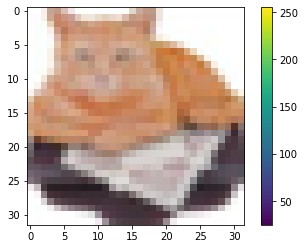

In [8]:
# Display image of one random image

num = random.randint(0, len(x_train))
print("This is the image of data at index:", num)
plt.imshow(x_train[num])
plt.colorbar()

# Data Preprocessing

In [9]:
x_train, x_test = x_train/255.0, x_test/255.0

In [10]:
print("The number of train dataset:", x_train.shape)
print("The number of train dataset:", y_train.shape)
print("The number of train dataset:", x_test.shape)
print("The number of train dataset:", y_test.shape)

The number of train dataset: (50000, 32, 32, 3)
The number of train dataset: (50000, 1)
The number of train dataset: (10000, 32, 32, 3)
The number of train dataset: (10000, 1)


In [11]:
print("The maximum value of data at x_train is:", np.max(x_train))
print("The maximum value of data at x_test is:", np.max(x_test))

The maximum value of data at x_train is: 1.0
The maximum value of data at x_test is: 1.0


# Building CNN Model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

In [13]:
model = Sequential()
# Input CNN Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=[32,32,3]))

# Hidden CNN Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))

# Output ANN Layer
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Training/Fitting Model

In [16]:
records = model.fit(x=x_train, y=y_train, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 21s 10ms/step - loss: 1.3548 - sparse_categorical_accuracy: 0.5140 - val_loss: 1.0848 - val_sparse_categorical_accuracy: 0.6138
Epoch 2/10
2000/2000 [==============================] - 19s 10ms/step - loss: 0.9956 - sparse_categorical_accuracy: 0.6491 - val_loss: 0.9868 - val_sparse_categorical_accuracy: 0.6562
Epoch 3/10
2000/2000 [==============================] - 19s 10ms/step - loss: 0.8452 - sparse_categorical_accuracy: 0.7014 - val_loss: 0.9467 - val_sparse_categorical_accuracy: 0.6728
Epoch 4/10
2000/2000 [==============================] - 19s 10ms/step - loss: 0.7195 - sparse_categorical_accuracy: 0.7443 - val_loss: 0.9622 - val_sparse_categorical_accuracy: 0.6694
Epoch 5/10
2000/2000 [==============================] - 19s 9ms/step - loss: 0.6133 - sparse_categorical_accuracy: 0.7835 - val_loss: 0.9639 - val_sparse_categorical_accuracy: 0.6811
Epoch 6/10
2000/2000 [==============================] - 19s 9ms/step - loss: 0.51

# Testing Model

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('The test loss of the model is:', test_loss)
print('The test accuracy of the model is:', test_accuracy * 100, '%.')

313/313 [==============================] - 2s 5ms/step - loss: 1.3829 - sparse_categorical_accuracy: 0.6608
The test loss of the model is: 1.3829375505447388
The test accuracy of the model is: 66.07999801635742 %.


#### The prediction is made based on probability. The class that has maximum probability is declared as the class of the product.

This shows that the accuracy of Train data is far more than that of Test and Cross Validation data. This means we are overfitting our model. Overfitting here means we are making our model complex but it is not learning anything new.

In [18]:
probabilities = model.predict(x_test)
probabilities[2]

array([1.3496299e-01, 2.2794996e-01, 8.4602492e-05, 1.1712229e-05,
       1.7153225e-05, 1.9323112e-09, 1.3071711e-08, 1.5959915e-06,
       2.0374730e-01, 4.3322468e-01], dtype=float32)

In [19]:
# Printing the maximum probability and the class with maximum probability

print(np.max(probabilities[0]))
print(list(probabilities[0]).index(np.max(probabilities[0])))

0.9270439
5


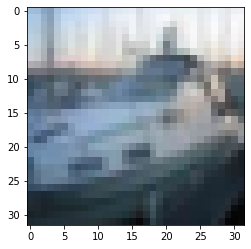

In [20]:
plt.imshow(x_test[2])

#### So the result matches our conclusion, i.e. our model predicted the product to belong to class 5, as we predicted it to.